#  Modeling count data using a negative binomial observation model
Here we generate an artificial longitudinal data set and analyse it.

In [1]:
require(lgpr)
require(repr)
require(ggplot2)

Loading required package: lgpr
This is lgpr, version 0.30.4.
Loading required package: repr
Loading required package: ggplot2


## 1. Simulating data
In this example we generate count data with 10 individuals and 8 measurement time points for each. 

[1] 0.4053117
 [1]  0  1  0  0  0  0  0  4  0  0  0  0  0  0  1 10  0  0  0  0  0  0  1  0  0
[26]  0  0  0  0  0  1  1  0  0  0  0  0  3  1  0  0  0  0  0  0  0  7  2  0  0
[51]  1  1  1  2  0  1  0  0  0  0  0  0  3  1  0  0  2  1  2  5  2  8  0  0  0
[76]  0  0  0  0  0


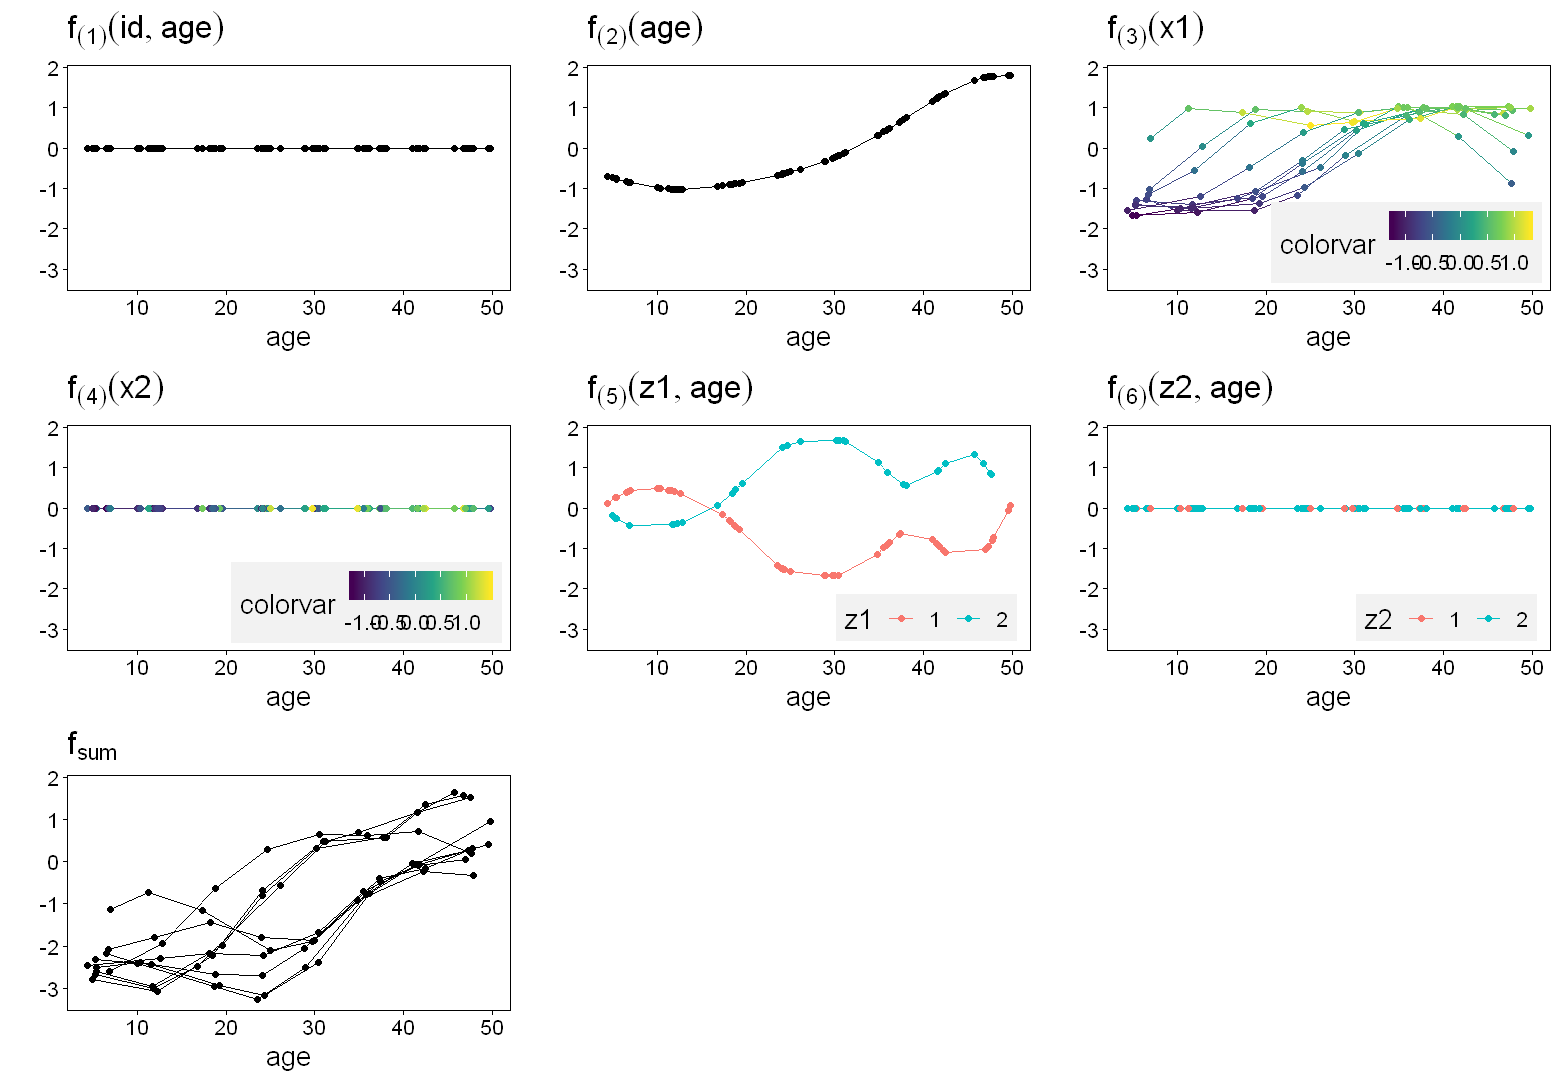

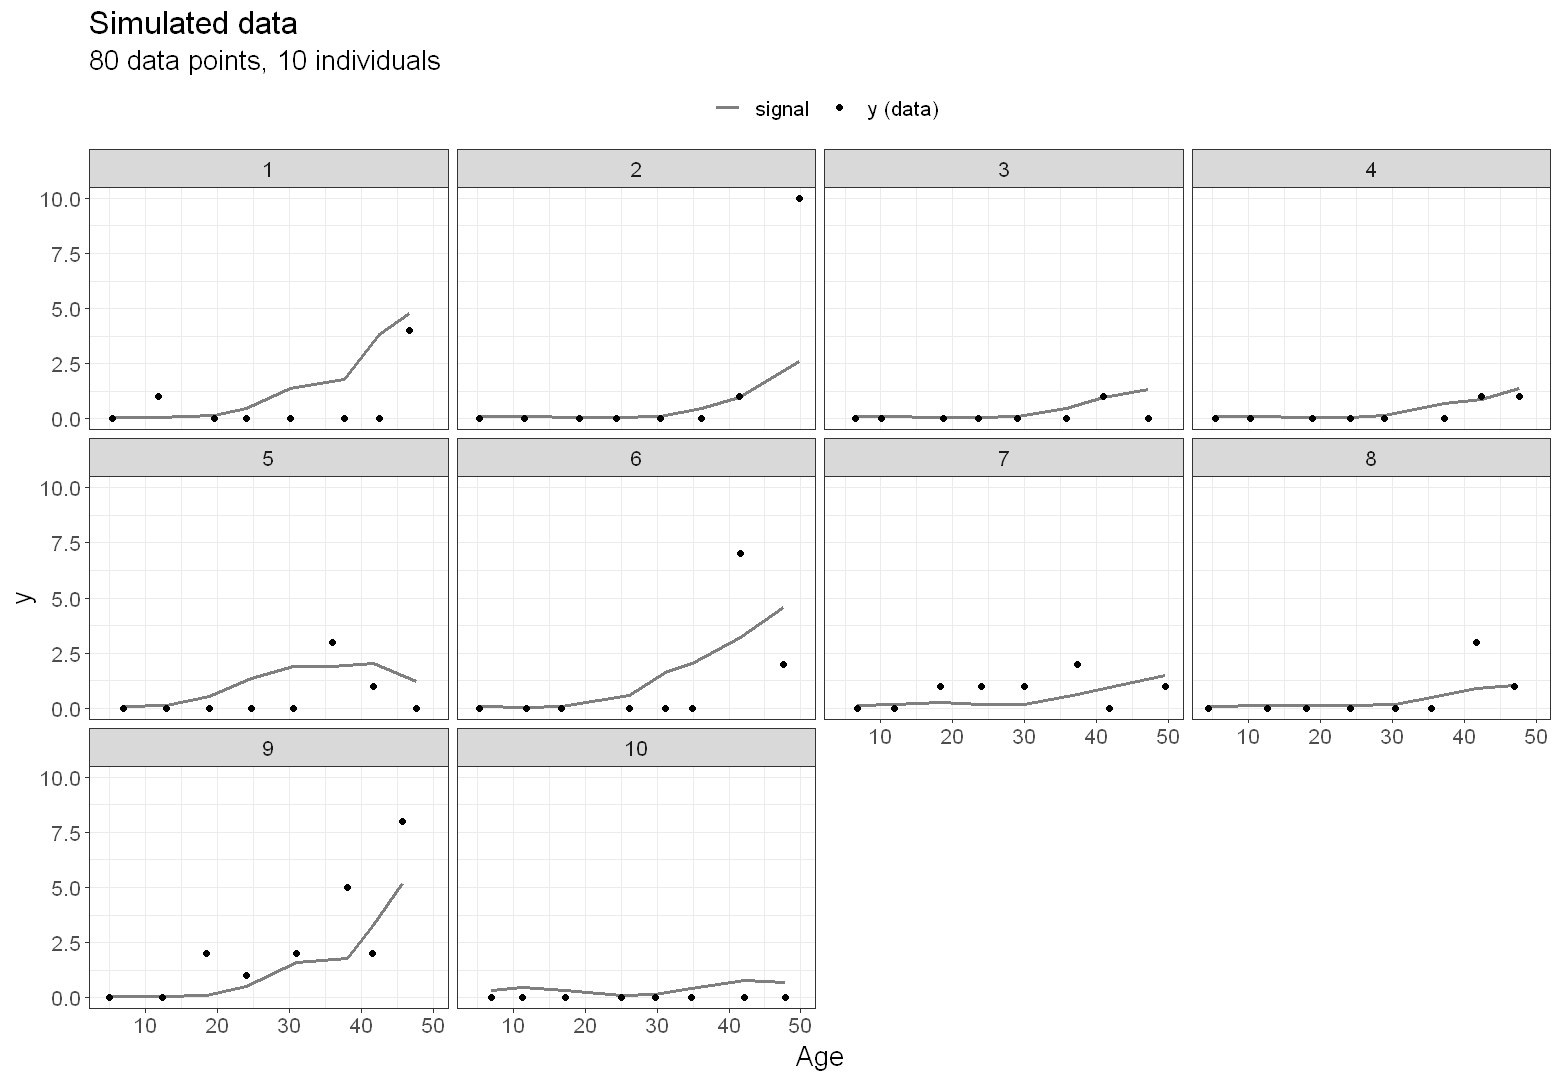

In [2]:
set.seed(123)
simData   <- simulate_data(N          = 10,
                         t_data       = seq(6, 48, by = 6),
                         covariates   = c(     1,1,2,2),
                         lengthscales = c(6,12,1,1,6,6),
                         relevances   = c(0,1,1,0,1,0),
                         noise_type   = "NB",
                         phi          = 2,
                         C_hat        = -1,
                         f_var        = 2,
                         t_jitter     = 1)

p_signal <- simData$p_signal
print(p_signal)
print(simData$data$y)

options(repr.plot.width=13, repr.plot.height=9)
plot_components_simdata(simData, font_size = 16, time_is_xvar = TRUE)
plot_simdata(simData) + theme(text=element_text(size=16)) 

## 2. Fitting the model

In [3]:
N_ITER <- 1000
fit <- lgp(formula   = y ~ id + age +  x1 + x2 + z1 + z2,
          data       = simData$data,
          likelihood = "NB",
          iter       = N_ITER, 
          parallel   = TRUE, 
          chains     = 4,
          control    = list(adapt_delta = 0.95),
          save_warmup = FALSE,
          refresh = 0,
          verbose = TRUE)

* Covariate 'x1' resolved to type 'continuous'.
* Covariate 'x2' resolved to type 'continuous'.
* Covariate 'z1' resolved to type 'categorical'.
* Covariate 'z2' resolved to type 'categorical'.

 ---------- LGPMODEL SUMMARY ----------

  Model:
    f = f[(1)](id, age) + f[(2)](age) + f[(3)](x1) + f[(4)](x2) + f[(5)](z1, age) + f[(6)](z2, age)
    Response variable: y
    Observation model: NB 
  Variable types:
    - Identifier variable: id
    - Time variable: age
    - Other continuous variables: x1, x2
    - Other categorical variables: z1, z2
  Observation model: NB

 ---------- PRIOR SPECIFICATIONS ----------

  alpha_id ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_age ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_continuous[1] ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_continuous[2] ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[1] ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[2] ~ Student-t(nu=20,mu=0,sigma=1)

  ell_id ~ Log-Normal(0,1)
  ell_age ~ Log-Normal(0,1)
  ell_continuous[1] ~ 

## 3. Visualizing

The averaged component relevances for each model are reported above. 

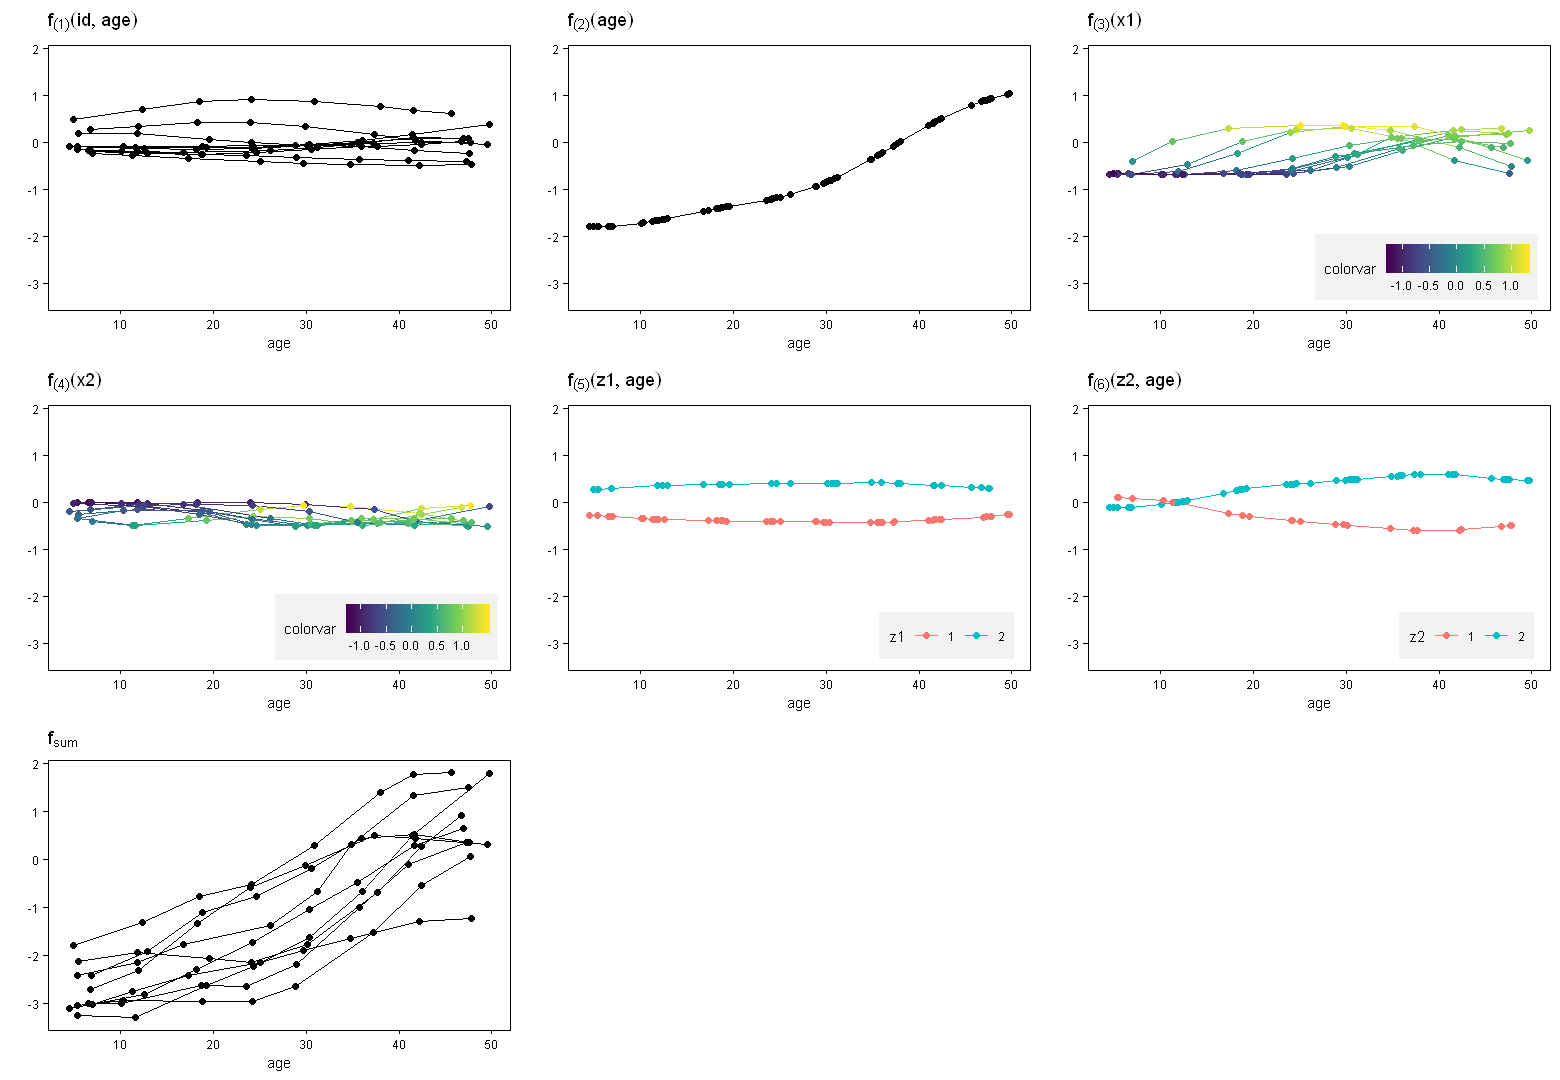

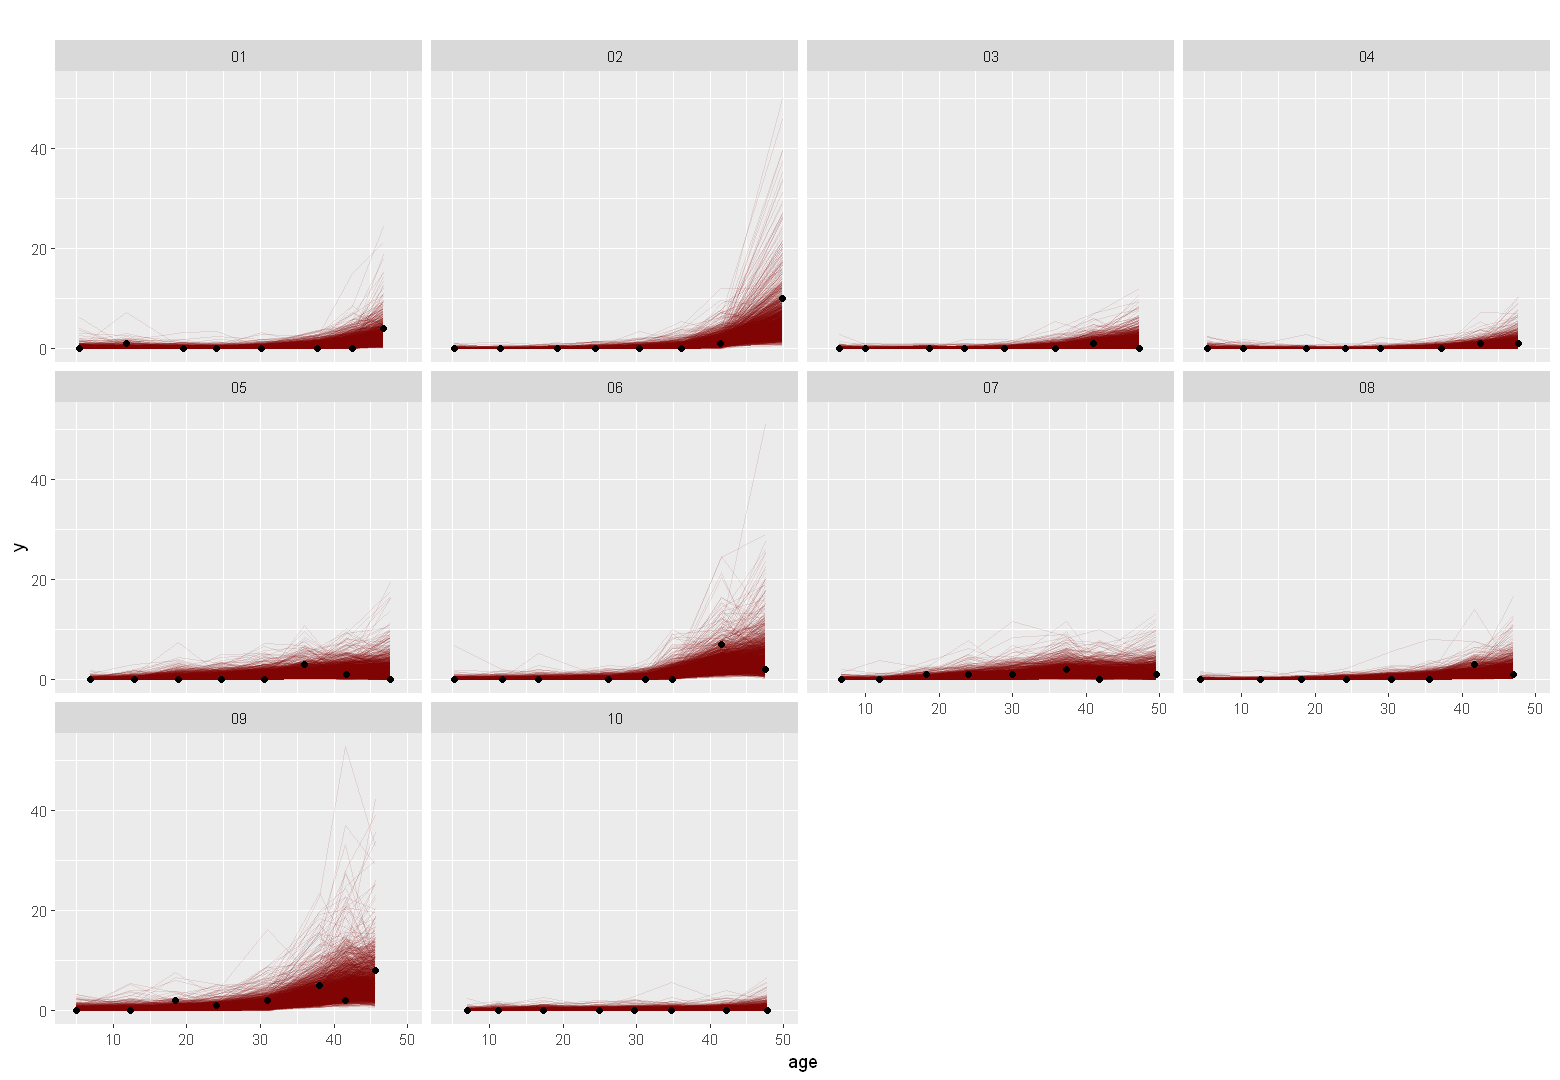

In [4]:
plot_components_posterior(fit)
plot_posterior_f(fit)

## 4. Selection probabilities

In [5]:
prob <- selection_prob(fit, h = 0.01)

We can visualize the selection probability of each component as a function of the threshold.

f[(1)](id, age)     f[(2)](age)      f[(3)](x1)      f[(4)](x2) f[(5)](z1, age) 
         0.7212          0.9525          0.5033          0.2878          0.5228 
f[(6)](z2, age) 
         0.6029 


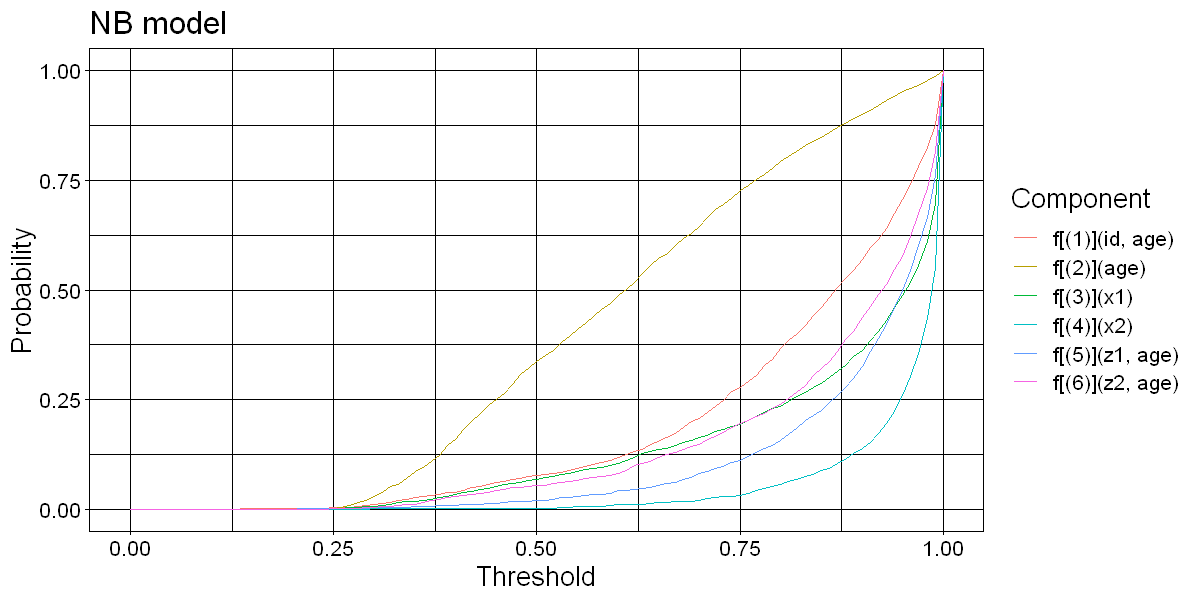

In [6]:
options(repr.plot.width=10, repr.plot.height=5)
print(round(prob$prob, 4)) # print selection probabilities, computed by weighing thresholds with Beta(100,5)
plt <- prob$plot + theme(text=element_text(size=16)) + ggtitle('NB model')
plt